## import model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.mplot3d import Axes3D
# Ubuntu system font path
font = FontProperties(fname='/usr/share/fonts/truetype/arphic/ukai.ttc')

## plot

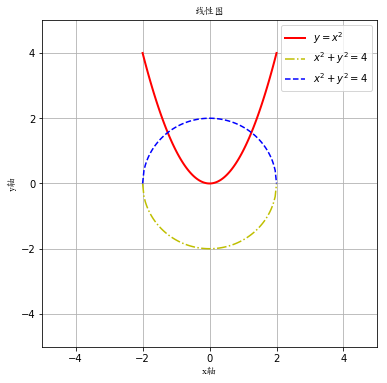

In [2]:
def plot_test():
    x = np.linspace(-2, 2, 100)
    y = x**2
    z = np.sqrt(4-x**2)
    plt.figure(figsize=(6,6))
    plt.plot(x,y,"r", label="$y=x^2$", linewidth=2)
    plt.plot(x, -z, "y-.", label="$x^2+y^2=4$")
    plt.plot(x,z,"b--",label="$x^2+y^2=4$")
    plt.xlabel("x轴", fontproperties=font)
    plt.ylabel("y轴", fontproperties=font)
    plt.title("线性图", fontproperties=font)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()
    plt.grid()
#     plt.savefig("ch_plot.png", format="png")
    plt.show()
plot_test()

## scatter test

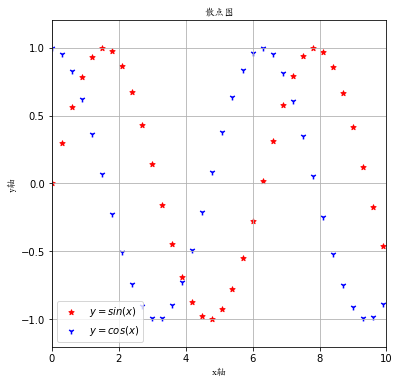

In [3]:
def scatter_test():
    x = np.arange(0, 10, 0.3)
    y = np.sin(x)
    z = np.cos(x)
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, label="$y=sin(x)$", color="red", s=30, marker="*")
    plt.scatter(x, z, label="$y=cos(x)$", color="blue", s=35, marker="1")
    plt.xlabel("x轴", fontproperties=font)
    plt.ylabel("y轴", fontproperties=font)
    plt.title("散点图", fontproperties=font)
    plt.xlim(0, 10)
    plt.ylim(-1.2, 1.2)
    plt.legend()
    plt.grid()
#     plt.savefig("scatter.png", format="png")
    plt.show()
scatter_test()

## subplot test

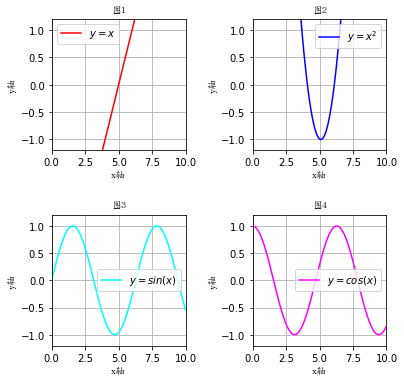

In [4]:
def subplot_test():
    a = 0
    x = np.linspace(0, 10, 100, dtype=np.float32) 
    y_0 = x-5
    y_1 = (x-5)**2 - 0.2*x
    y_2 = np.sin(x)
    y_3 = np.cos(x)
    y = [y_0, y_1, y_2, y_3]
    label_list = ["$y=x$", "$y=x^2$", "$y=sin(x)$", "$y=cos(x)$"]
    color_list = ["red", "blue", "cyan", "magenta"]
    plt.figure(figsize=(6, 6))
    plt.title("分区图", fontproperties=font)
    for i in range (4):
        a += 1
        plt.subplot(2,2, a).set_title("Figure {}".format(a))
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.plot(x,y[i], label=label_list[i], color=color_list[i])
        plt.xlabel("x轴", fontproperties=font)
        plt.ylabel("y轴", fontproperties=font)
        plt.title("图{}".format(a), fontproperties=font)
        plt.legend()
        plt.xlim(0, 10)
        plt.ylim(-1.2, 1.2)
        plt.grid()

    plt.savefig("subplot.png", format="png")
    plt.show()
subplot_test()

## histgram test

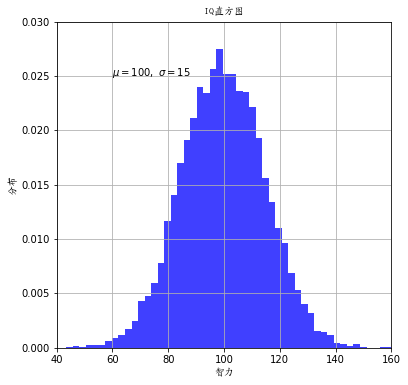

In [5]:
def histogram_test():
    np.random.seed(19680801)
    mu, sigma = 100, 15
    x = mu + sigma * np.random.randn(10000)
    plt.figure(figsize=(6, 6))
    n, bins, patches = plt.hist(x, 50, density=1, facecolor='b', alpha=0.75)
    plt.xlabel('智力', fontproperties=font)
    plt.ylabel('分布', fontproperties=font)
    plt.title('IQ直方图', fontproperties=font)
    plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.axis([40, 160, 0, 0.03])
    plt.grid(True)
    plt.savefig("histogram.png", format="png")
    plt.show()
histogram_test()

## pie test

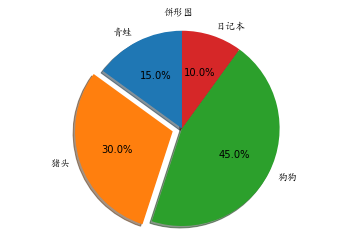

In [6]:
def pie():
    labels = ['青蛙', '猪头', '狗狗', '日记本']
    sizes = [15, 30, 45, 10]
    explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    fig1, ax1 = plt.subplots()
    test_pie = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    test_font = [font_value.set_fontproperties(font) for font_value in test_pie[1]]
    ax1.axis('equal', fontproperties=font)  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('饼形图', fontproperties=font)
    plt.savefig("pie_test.png", format="png")
    plt.show()
pie()

## pie with labels

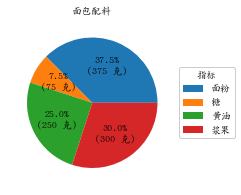

In [7]:
def pie_labels():
    fig, ax = plt.subplots(figsize=(5, 3), subplot_kw=dict(aspect="equal"))

    recipe = ["375 克 面粉",
              "75 克 糖",
              "250 克 黄油",
              "300 克 浆果"]
    data = [float(x.split()[0]) for x in recipe]
    ingredients = [x.split()[-1] for x in recipe]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d} 克)".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    font_test = ax.legend(wedges, ingredients,
              title="指标",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1), prop=font, framealpha=1)
    font_test.get_title().set_fontproperties(font)
    plt.setp(autotexts, size=8, weight="bold", fontproperties=font, color="k")

    ax.set_title("面包配料", fontproperties=font)
    plt.savefig("pie_labels.png", format="png")

    plt.show()
pie_labels()

## bar test

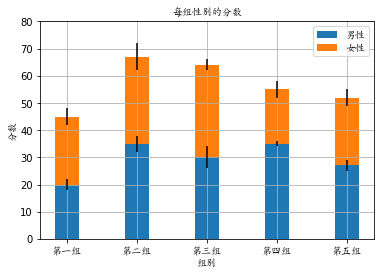

In [8]:
def bar_test():
    N = 5
    menMeans = (20, 35, 30, 35, 27)
    womenMeans = (25, 32, 34, 20, 25)
    menStd = (2, 3, 4, 1, 2)
    womenStd = (3, 5, 2, 3, 3)
    ind = np.arange(N)    
    width = 0.35      
    # yerr标准差(图中黑线)
    p1 = plt.bar(ind, menMeans, width, yerr=menStd)
    # bottom以man为基准
    p2 = plt.bar(ind, womenMeans, width,
                 bottom=menMeans, yerr=womenStd)
    plt.xlabel("组别", fontproperties=font)
    plt.ylabel('分数', fontproperties=font)
    plt.title('每组性别的分数', fontproperties=font)
    plt.xticks(ind, ('第一组','第二组','第三组','第四组','第五组'), fontproperties=font)
    plt.yticks(np.arange(0, 81, 10))
    plt.legend((p1[0], p2[0]), ('男性', '女性'), prop=font)
    plt.grid()
    plt.savefig('bar_test.png', format='png')
    plt.show()
bar_test()

## meshgrid test

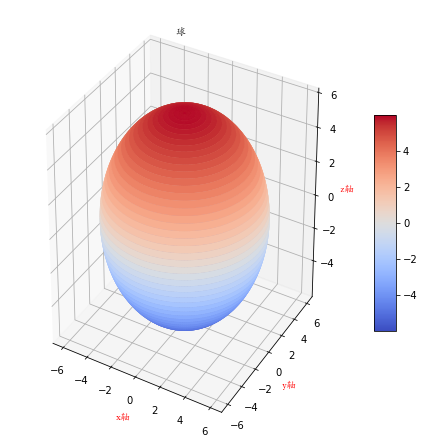

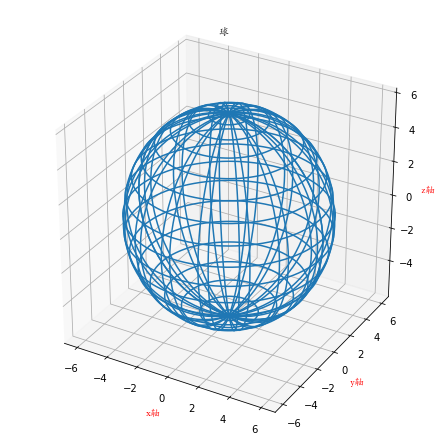

In [9]:
def meshgrid_test():
    center = [0, 0, 0]
    radius = 6

    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0, 2*np.pi, 100)
    x = radius * np.outer(np.cos(u), np.sin(v) + center[0])
    y = radius * np.outer(np.sin(u), np.sin(v) + center[0])
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v)) + center[2]

    fig1 = plt.figure(1, figsize=(6, 6))
    ax1 = Axes3D(fig1)
    plt.title("球", fontproperties=font)
    surf_1 = ax1.plot_surface(x, y, z, rstride=1, cstride=1, cmap=plt.cm.coolwarm)
    ax1.set_xlabel('x轴', color='r', fontproperties=font)
    ax1.set_ylabel('y轴', color='r', fontproperties=font)
    ax1.set_zlabel('z轴', color='r', fontproperties=font)
    fig1.colorbar(surf_1, shrink=0.5, aspect=10)
    plt.savefig("meshgrid_test.png", format="png")


    fig2 = plt.figure(2, figsize=(6, 6))
    ax2 = Axes3D(fig2)
    ax2.plot_wireframe(x, y, z, rstride=6, cstride=6)
    ax2.set_xlabel('x轴', color='r', fontproperties=font)
    ax2.set_ylabel('y轴', color='r', fontproperties=font)
    ax2.set_zlabel('z轴', color='r', fontproperties=font)
    plt.title("球", fontproperties=font)
    plt.savefig("meshgrid_test_1.png", format="png")
    plt.show()

meshgrid_test()